# Plot for Genetics Parts

- Figure 3 
- Supplementary Figure 5

In [1]:
import pandas as pd
from pathlib import Path
from config import *
import numpy as np

from ppp_prediction.plot import save_fig
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from plotnine import *
from utils import *
import math
from pypalettes import load_cmap

Figure3Dir = FigureDir / "Figure3"
SuppFigure5Dir = FigureDir / "SuppFig5"
Figure3Dir.mkdir(exist_ok=True, parents=True)
SuppFigure5Dir.mkdir(exist_ok=True, parents=True)
plt.rcParams["font.family"] = "Calibri"
print(f"default dpi is {default_dpi}")
# %config InlineBackend.figure_format = "svg"
# %config InlineBackend.print_figure_kwargs = {"dpi" : 300}

[0.0, 0.5, 1.0]
[0.0, 50.0, 100.0]
[0.0, 20.0, 40.0, 60.0, 80.0]
default dpi is 400


In [2]:
compare_res_df_fdr = pd.read_feather(RawDataDir / "Genetics_120_results.feather")
compare_res_df_fdr

,Feature,Traits,pearsonr,spearmanr,N,R2,p_adj,pvalue,R2_SE,R2_LCI,R2_UCI,R2 (95% CI),ScoreType
0,Face,Weight,0.709594,0.727165,66,5.035242e-01,1.843660e-13,7.845361e-16,0.082262,0.339000,0.668048,"0.504 (0.339, 0.668)",Face
1,Face,Height,0.681697,0.658352,66,4.647110e-01,1.596410e-11,9.057647e-14,0.085206,0.294299,0.635123,"0.465 (0.294, 0.635)",Face
2,Face,HCT,0.640139,0.644037,111,4.097774e-01,1.248068e-15,3.342308e-18,0.069501,0.270776,0.548779,"0.410 (0.271, 0.549)",Face
3,Face,Hb,0.639854,0.657141,111,4.094134e-01,1.248068e-15,3.540618e-18,0.069513,0.270388,0.548439,"0.409 (0.270, 0.548)",Face
4,Face,BMI,0.594923,0.662826,66,3.539328e-01,3.218344e-07,3.195519e-09,0.089749,0.174435,0.533431,"0.354 (0.174, 0.533)",Face
...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,PGS001405,Height,0.002861,-0.031840,66,8.186989e-06,9.873396e-01,9.817377e-01,0.000668,-0.001328,0.001344,"0.000 (-0.001, 0.001)",PRS
701,PGS001229,Height,0.001234,0.046911,66,1.523536e-06,9.949439e-01,9.921214e-01,0.000288,-0.000575,0.000578,"0.000 (-0.001, 0.001)",PRS
702,PGS004005,eGFR(CKD-EPI),0.000951,0.007788,111,9.038214e-07,9.949439e-01,9.920807e-01,0.000175,-0.000349,0.000351,"0.000 (-0.000, 0.000)",PRS
703,PGS003227,eGFR(CKD-EPI),0.000765,-0.039321,111,5.854793e-07,9.950375e-01,9.936261e-01,0.000141,-0.000281,0.000282,"0.000 (-0.000, 0.000)",PRS


In [3]:
color_list = [
    "#003D8C",  # 深蓝
    "#66A1D5",  # 浅蓝
    "#006B3F",  # 深绿色
    "#A3D99B",  # 浅绿色
    "#5E4B8A",  # 深紫
    "#D9C6E7",  # 浅紫
    "#F57C20",  # 橙色
    "#C0C0C0",  # 灰色
    "#B80000",  # 深红
    "#FFB3B3",  # 浅红
    "#E0A300",  # 深黄
    "#F4D65E",  # 浅黄
    "#007A8A",  # 深青
    "#B2E7E5",  # 浅青
    "#4D4D4D",  # 深灰
    "#C7C7C7",  # 浅灰
    "#007C92",  # 海洋蓝
    "#A5D66D",  # 清新绿
    "#D5006D",  # 粉色
    "#CED2D7",  # 银色
    "#4B4F20",  # 深橄榄绿
    "#C9D69B",  # 浅橄榄绿
    "#7B2431",  # 深红棕
    "#E6A3B5",  # 浅红棕
    "#FFA300",  # 黄橙
    "#A9C3D6",  # 浅灰蓝
    "#009C99",  # 青色
    "#B2E7B2",  # 浅薄荷绿
    "#6C8EBF",  # 灰蓝
    "#F7F7F7",  # 清新白
    "#A87A9D",  # 紫藤色
    "#F2B925",  # 杏色
]

### Figure 3

In [4]:
from plotnine import *
import pandas as pd


def dumbbell_plot_v2(
    data,
    x,
    y,
    group_col,
    ref_group,
    new_group,
    other_group=None,
    color_dict=None,
    figsize=(6, 6),
    decrease_cutoff=0,
    decrease_alpha=0.1,
    facet=None,
    **kwargs,
):
    """
    Generate a dumbbell plot using the given data.
    Parameters:
    - data: DataFrame
        The input data containing the necessary columns.
    - x: str
        The column name for the x-axis.
    - y: str
        The column name for the y-axis.
    - group_col: str
        The column name for grouping the data.
    - ref_group: str
        The reference group for comparison of group_col
    - new_group: str
        The new group for comparison of group_col
    - color_dict: dict
        A dictionary mapping group names to color values.
    - figsize: tuple, optional
        The size of the figure (default is (6, 6)).
    - **kwargs: optional
        Additional keyword arguments to be passed to the plot.
    Returns:
    - p: ggplot object
        The dumbbell plot.

    Example code:
    from ppp_prediction.plot.dumbbell import dumbbell_plot_v2

    demo_data = pd.DataFrame(
        {
            "x": np.repeat([1, 2, 3, 4, 5], 2),
            "y": np.random.randn(10),
            "group_col": np.tile(["A", "B"], 5),
        }
    )
    demo_data["x"] = pd.Categorical(demo_data["x"].astype(str), ["1", "2", "3", "4", "5"])
    ref = "A"
    new = "B"

    dumbbell_plot_v2(
        data=demo_data,
        x="x",
        y="y",
        group_col="group_col",
        ref_group=ref,
        new_group=new,
        figsize=(4, 3),
    )
    """
    if color_dict is None:
        color_dict = {ref_group: "#00a5ff", new_group: "#f26c64"}
    other_group = other_group if other_group is not None else []
    need_cols = [ref_group, *other_group, new_group]
    plt_data1 = data.query(f"{group_col} in @need_cols")

    plt_data1[group_col] = pd.Categorical(
        plt_data1[group_col], categories=need_cols, ordered=True
    )

    plt_data = plt_data1.pivot_table(index=x, columns=group_col, values=y).reset_index(
        drop=False
    )

    plt_data["diff"] = plt_data[new_group] - plt_data[ref_group]
    plt_data = plt_data.sort_values("diff", ascending=False)
    plt_data[x] = pd.Categorical(
        plt_data[x], categories=plt_data[x].values[::-1], ordered=True
    )

    # x_order = plt_data[x].values.tolist()

    base_size = 1
    base_alpha = 1
    cutoff = decrease_cutoff

    gain_x = plt_data.query("diff > @cutoff")[x].tolist()
    decrease_x = plt_data.query("diff < @cutoff")[x].tolist()

    gain_df = plt_data1.query(f"{x} in @gain_x")
    decrease_df = plt_data1.query(f"{x} in @decrease_x")

    gain_df_segement = plt_data.query(f"{x} in @gain_x")
    decrease_df_segement = plt_data.query(f"{x} in @decrease_x")

    p = ggplot(data=plt_data, mapping=aes(x=x, color=x))
    if facet is not None:
        p += facet_wrap(facet)

    if len(other_group) > 0:
        for col in other_group:
            p += geom_point(
                data=plt_data1.query(f"{group_col} == @col"),
                mapping=aes(x=x, y=y, color=group_col),
                size=base_size * 4,
                alpha=base_alpha,
            )

    p = (
        p
        + geom_segment(
            data=gain_df_segement,
            mapping=aes(xend=x, y=ref_group, yend=new_group),
            color="#bebebe",
            size=base_size,
        )
        + geom_point(
            data=gain_df,
            mapping=aes(x=x, y=y, color=group_col),
            size=base_size * 4,
            alpha=base_alpha,
        )
        + geom_segment(
            data=decrease_df_segement,
            mapping=aes(xend=x, y=ref_group, yend=new_group),
            color="#bebebe",
            size=base_size,
            alpha=decrease_alpha,
        )
        + geom_point(
            data=decrease_df,
            mapping=aes(x=x, y=y, color=group_col),
            size=base_size * 4,
            alpha=decrease_alpha,
        )
        # + scale_color_manual(values=load_cmap("Classic_Cyclic").colors)
        + theme_classic(base_family="Calibri", base_size=12)  # 使用Tufte主题
        + theme(axis_line=element_line())
        + theme(
            figure_size=figsize,
            legend_position="top",
            axis_text_x=element_text(angle=90),
            strip_background=element_blank(),
            axis_text=element_text(size=12),  # 调整轴文字大小
            axis_title=element_text(size=14),  # 调整轴标题大小和样式
            legend_title=element_text(size=14),  # 调整图例标题大小和样式
            legend_text=element_text(size=14),  # 调整图例文字大小
            strip_text=element_text(size=14),  # 调整分面标签的大小和样式
            plot_title=element_text(size=16, hjust=0.5),  # 添加图表标题并居中
            # plot_margin = margin(10, 10, 10, 10)  # 设置图表边距
        )
        + scale_color_manual(values=color_dict)
        + guides(color=guide_legend(title=group_col))
        # + scale_color_discrete(breaks=[ref, new], labels=[ref, new])
        + labs(x=x, y=y)
        # + coord_flip()
    )

    return p

#### Figure 3a

In [5]:
# Only keep the best PRS
face_verse_prs_df = (
    compare_res_df_fdr.sort_values("R2", ascending=False)
    .groupby(["Traits", "ScoreType"])
    .head(1)
    .sort_values("R2", ascending=False)
)

/home/xutingfeng/miniforge3/envs/rapids-24.02/lib/python3.10/site-packages/plotnine/ggplot.py:606: PlotnineWarning: Saving 12 x 5 in image.
/home/xutingfeng/miniforge3/envs/rapids-24.02/lib/python3.10/site-packages/plotnine/ggplot.py:607: PlotnineWarning: Filename: V1/paper/Figure/Figure3/Figure3A.png
/home/xutingfeng/miniforge3/envs/rapids-24.02/lib/python3.10/site-packages/plotnine/ggplot.py:606: PlotnineWarning: Saving 12 x 5 in image.
/home/xutingfeng/miniforge3/envs/rapids-24.02/lib/python3.10/site-packages/plotnine/ggplot.py:607: PlotnineWarning: Filename: V1/paper/Figure/Figure3/Figure3A.pdf
/home/xutingfeng/miniforge3/envs/rapids-24.02/lib/python3.10/site-packages/plotnine/ggplot.py:606: PlotnineWarning: Saving 12 x 5 in image.
/home/xutingfeng/miniforge3/envs/rapids-24.02/lib/python3.10/site-packages/plotnine/ggplot.py:607: PlotnineWarning: Filename: V1/paper/Figure/Figure3/Figure3A.svg
/home/xutingfeng/miniforge3/envs/rapids-24.02/lib/python3.10/site-packages/plotnine/ggplot.

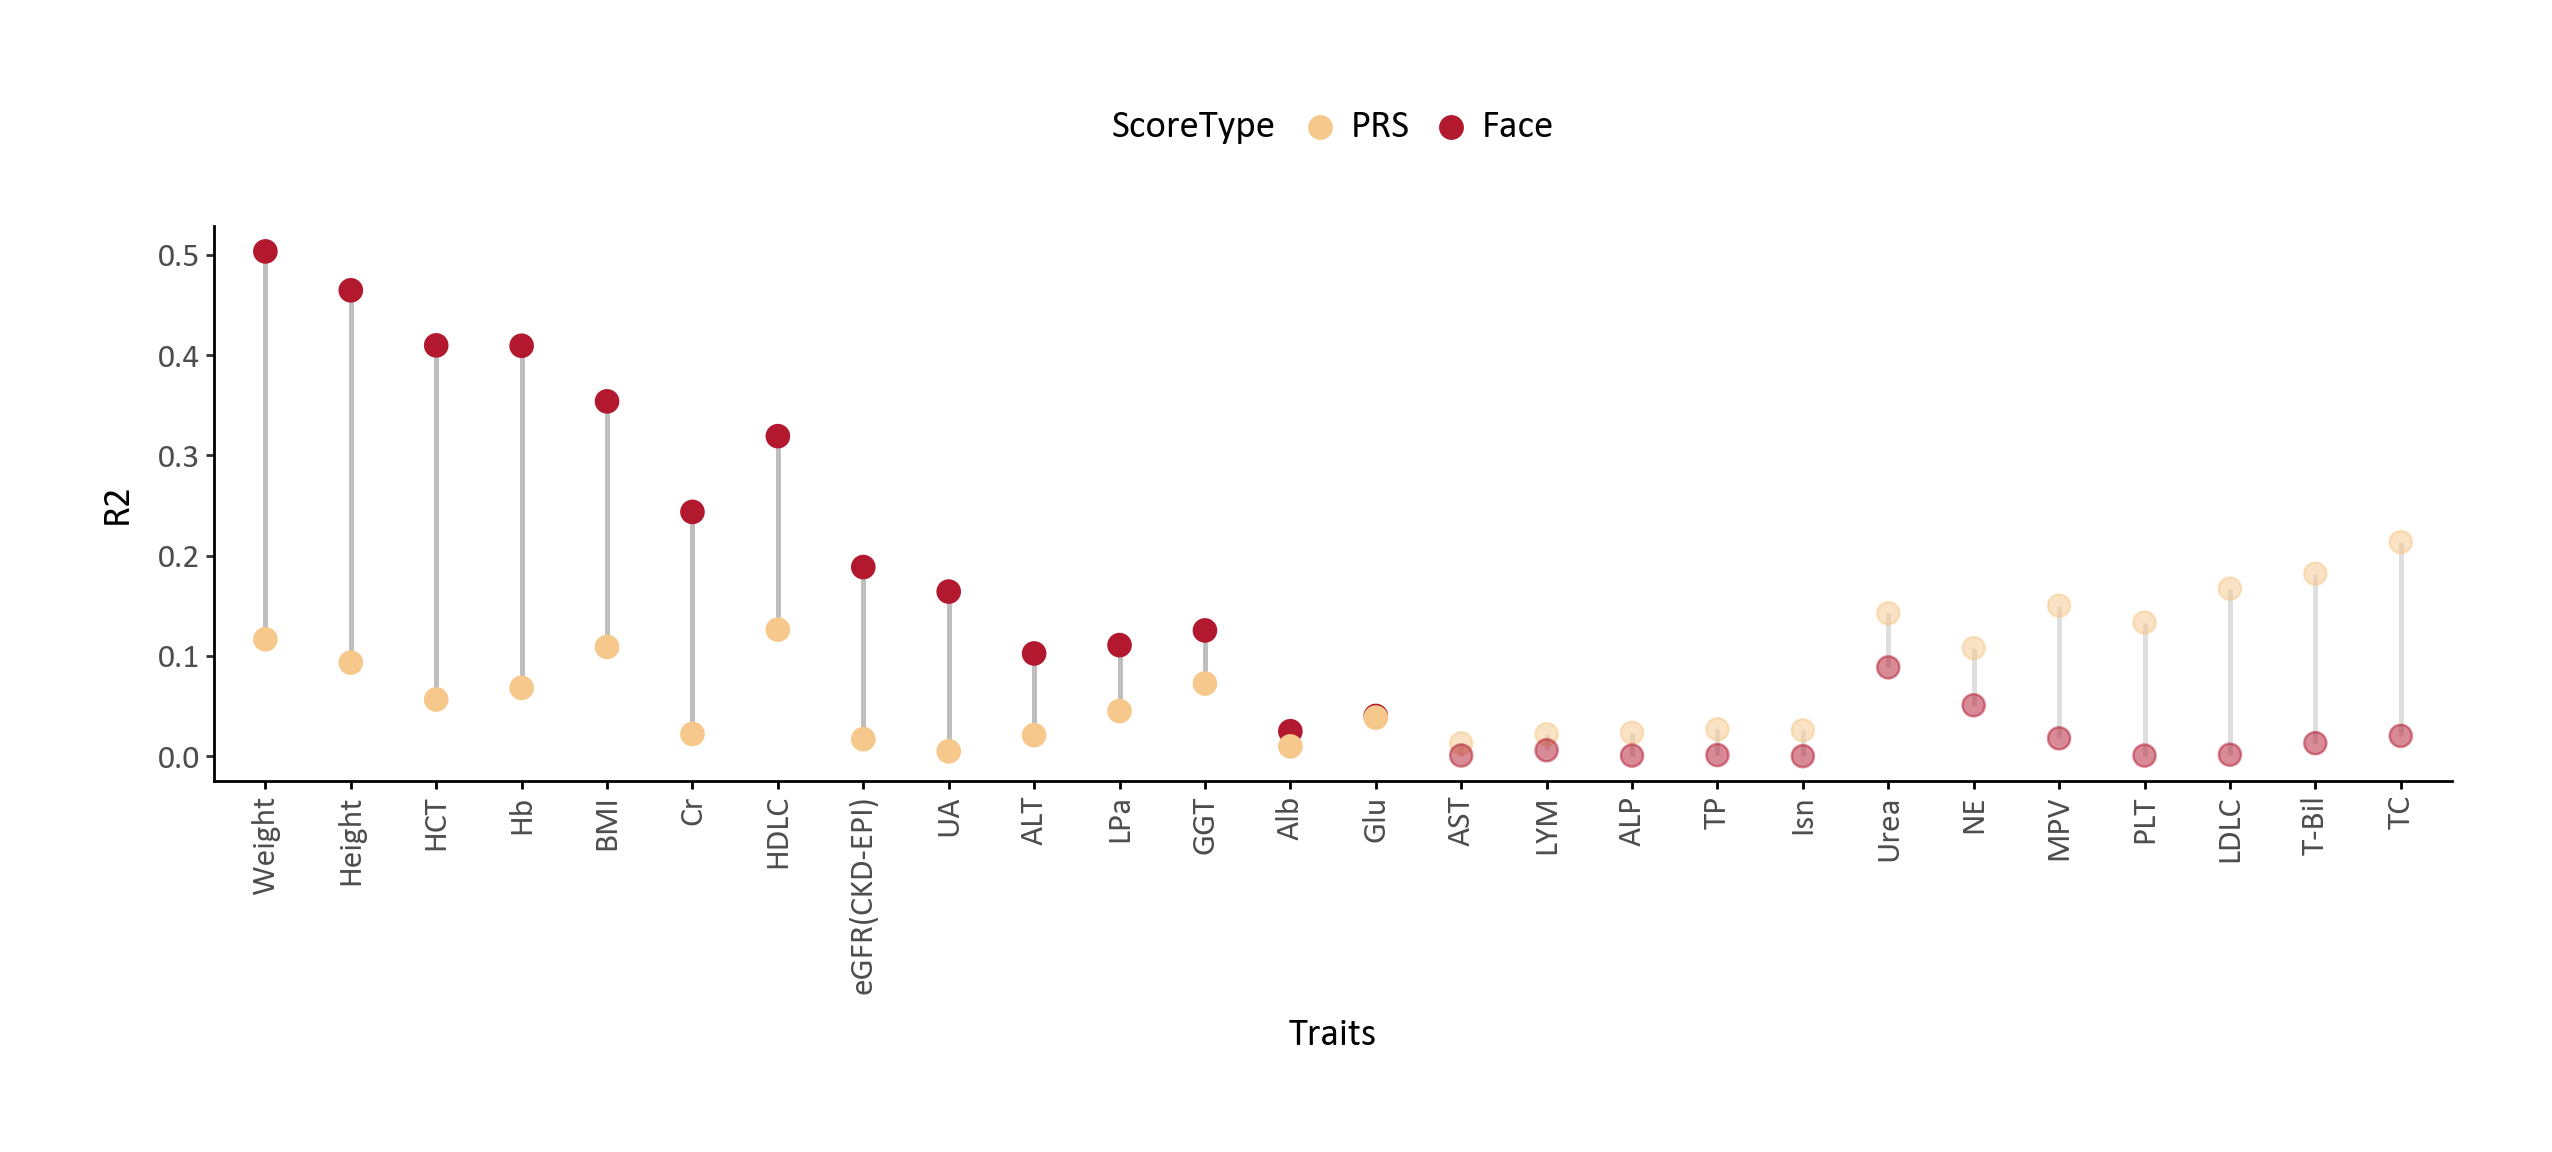

In [6]:
# order = face_verse_prs_df.query("ScoreType == 'Face'")['Traits'].drop_duplicates().values.tolist()
order = (
    (
        face_verse_prs_df.query("ScoreType == 'Face'")
        .set_index("Traits")["R2"]
        .sort_index()
        - face_verse_prs_df.query("ScoreType == 'PRS'")
        .sort_values("Traits")
        .set_index("Traits")["R2"]
        .sort_index()
    )
    .sort_values(ascending=False)
    .index.tolist()
)
face_verse_prs_df["Traits"] = pd.Categorical(
    face_verse_prs_df["Traits"], categories=order, ordered=True
)
p = dumbbell_plot_v2(
    data=face_verse_prs_df,
    x="Traits",
    y="R2",
    group_col="ScoreType",
    ref_group="PRS",
    new_group="Face",
    figsize=(12, 5),
    color_dict={"PRS": "#F6C88B", "Face": "#b2182e"},
    decrease_alpha=0.5,
)

# save_fig(p, Figure5Dir / "Figure5A", dpi=default_dpi)
save_fig(p, Figure3Dir / "Figure3A", dpi=default_dpi)
p

#### Figure 3b

/tmp/ipykernel_1849883/1234366326.py:7: UserWarning: The palette list has more values (91) than needed (10), which may not be intended.
/tmp/ipykernel_1849883/1234366326.py:7: UserWarning: The palette list has more values (91) than needed (10), which may not be intended.
/tmp/ipykernel_1849883/1234366326.py:7: UserWarning: The palette list has more values (91) than needed (10), which may not be intended.
/tmp/ipykernel_1849883/1234366326.py:7: UserWarning: The palette list has more values (91) than needed (10), which may not be intended.


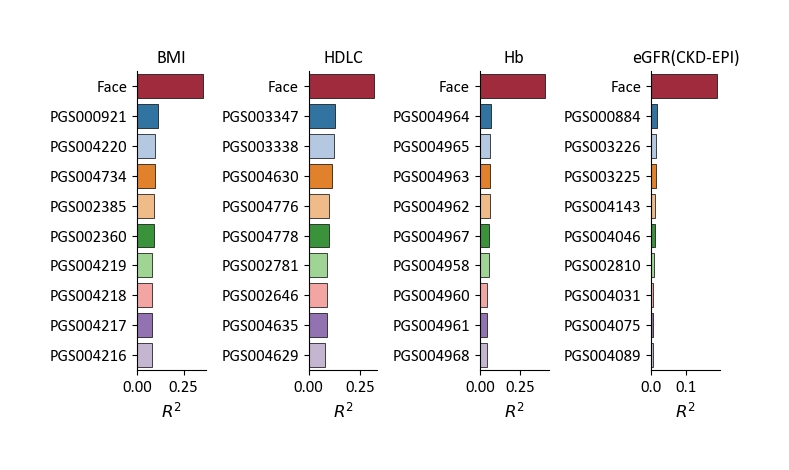

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 4, figsize=(7, 4))
for idx, tgt in enumerate(["BMI", "HDLC", "Hb", "eGFR(CKD-EPI)"]):
    ax = axes[idx]
    sns.barplot(
        compare_res_df_fdr.query(f"Traits == '{tgt}'")
        .sort_values("R2", ascending=False)
        .head(10),
        y="Feature",
        x="R2",
        hue="Feature",
        edgecolor="black",
        lw=0.5,
        palette=["#b2182e"]
        + [
            "#1f77b4",
            "#aec7e8",
            "#ff7f0e",
            "#ffbb78",
            "#2ca02c",
            "#98df8a",
            "#ff9896",
            "#9467bd",
            "#c5b0d5",
        ]
        * 10,
        ax=ax,
    )
    # plt.setp(ax.get_xticklabels(), rotation=90)
    plt.setp(ax.get_yticklabels(), rotation=0, fontsize=12)
    plt.setp(ax.get_xticklabels(), rotation=0, fontsize=12)
    # ax.set_xticklabels(['Face'] + [''] * len(ax.get_xticklabels()))
    ax.set_title(tgt, fontsize=13)
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.set_ylabel("", fontsize=12)
    ax.set_xlabel(r"$R^2$", fontsize=12)
fig.tight_layout()
save_fig(fig, Figure3Dir / "Figure3B", dpi=default_dpi)

# save_fig(fig, Figure5Dir / "Figure5C", dpi=default_dpi)

#### Figure 3c

In [8]:
RelativeDataDir = RawDataDir / "RelativeImportance_Cardiovascular_full_Genetics.csv"

relim_df = pd.read_csv(RelativeDataDir)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


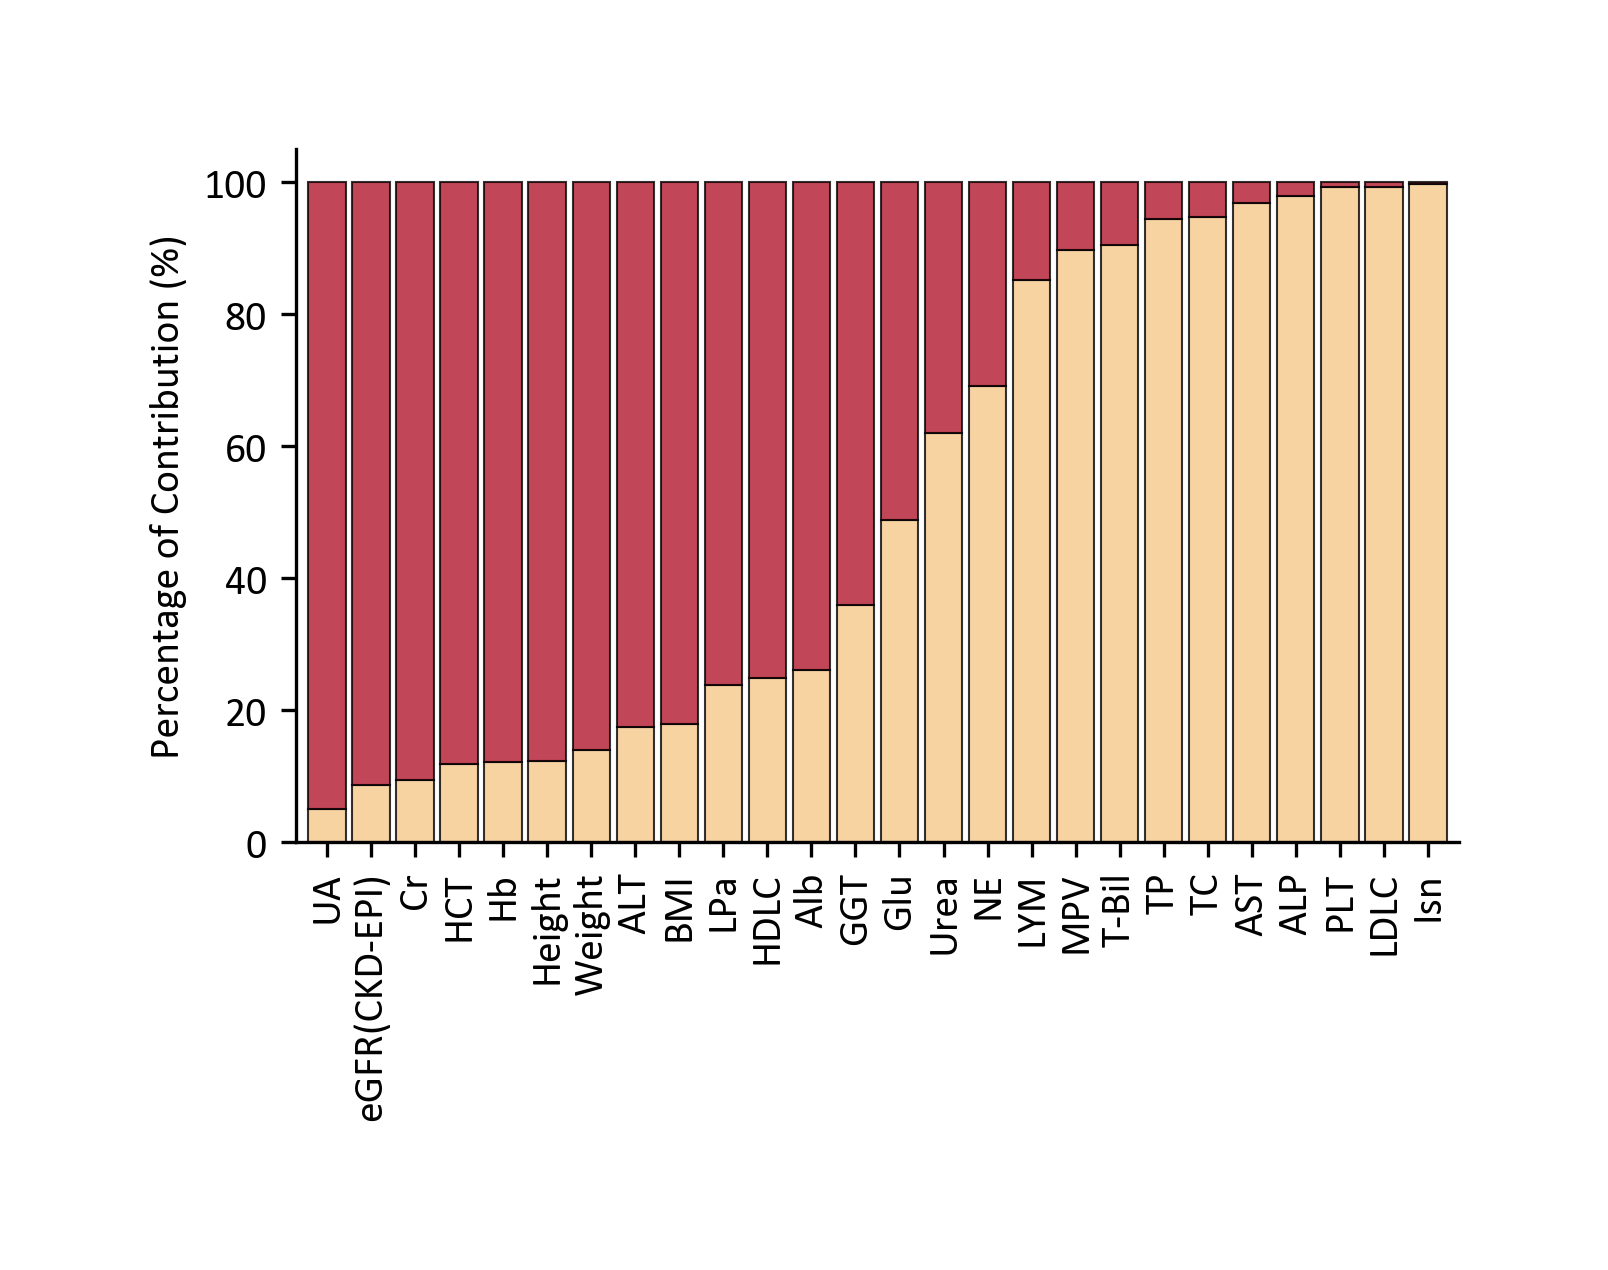

In [14]:
from ppp_prediction.plot.bar import plot_stacked_bar_chart

fig, ax = plt.subplots(figsize=(5, 3), dpi=300)
plot_stacked_bar_chart(
    data=relim_df,
    x="Traits",
    y="Importance",
    hue="Omics",
    sort_hue_order_by=["Face"],
    colors=[
        # "#F4B183",
        # "#B7D3B0",
        "#b2182e",
        "#F6C88B",
    ][::-1],
    barkwargs={"edgecolor": "black", "lw": 0.5, "alpha": 0.8},
    ax=ax,
)
plt.setp(ax.get_xticklabels(), rotation=90, rotation_mode="anchor", va="center")
# ax.legend(
#     loc="lower center",
#     bbox_to_anchor=(0.5, 1),
#     frameon=False,
#     title="Face vs Genetics",
#     ncols=2
# )
# rm legend
ax.legend_.remove()
ax.set_xlim(ax.get_xlim()[0] - 0.2, ax.get_xlim()[1] + 0.2)
ax.set_xlabel("")
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.set_ylabel("Percentage of Contribution (%)")
save_fig(fig, Figure3Dir / "Figure3C", dpi=default_dpi)

### Supplementary Figure 5

/tmp/ipykernel_1849883/3612815977.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
/tmp/ipykernel_1849883/3612815977.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
/tmp/ipykernel_1849883/3612815977.py:16: UserWarning: The palette list has more values (32) than needed (26), which may not be intended.


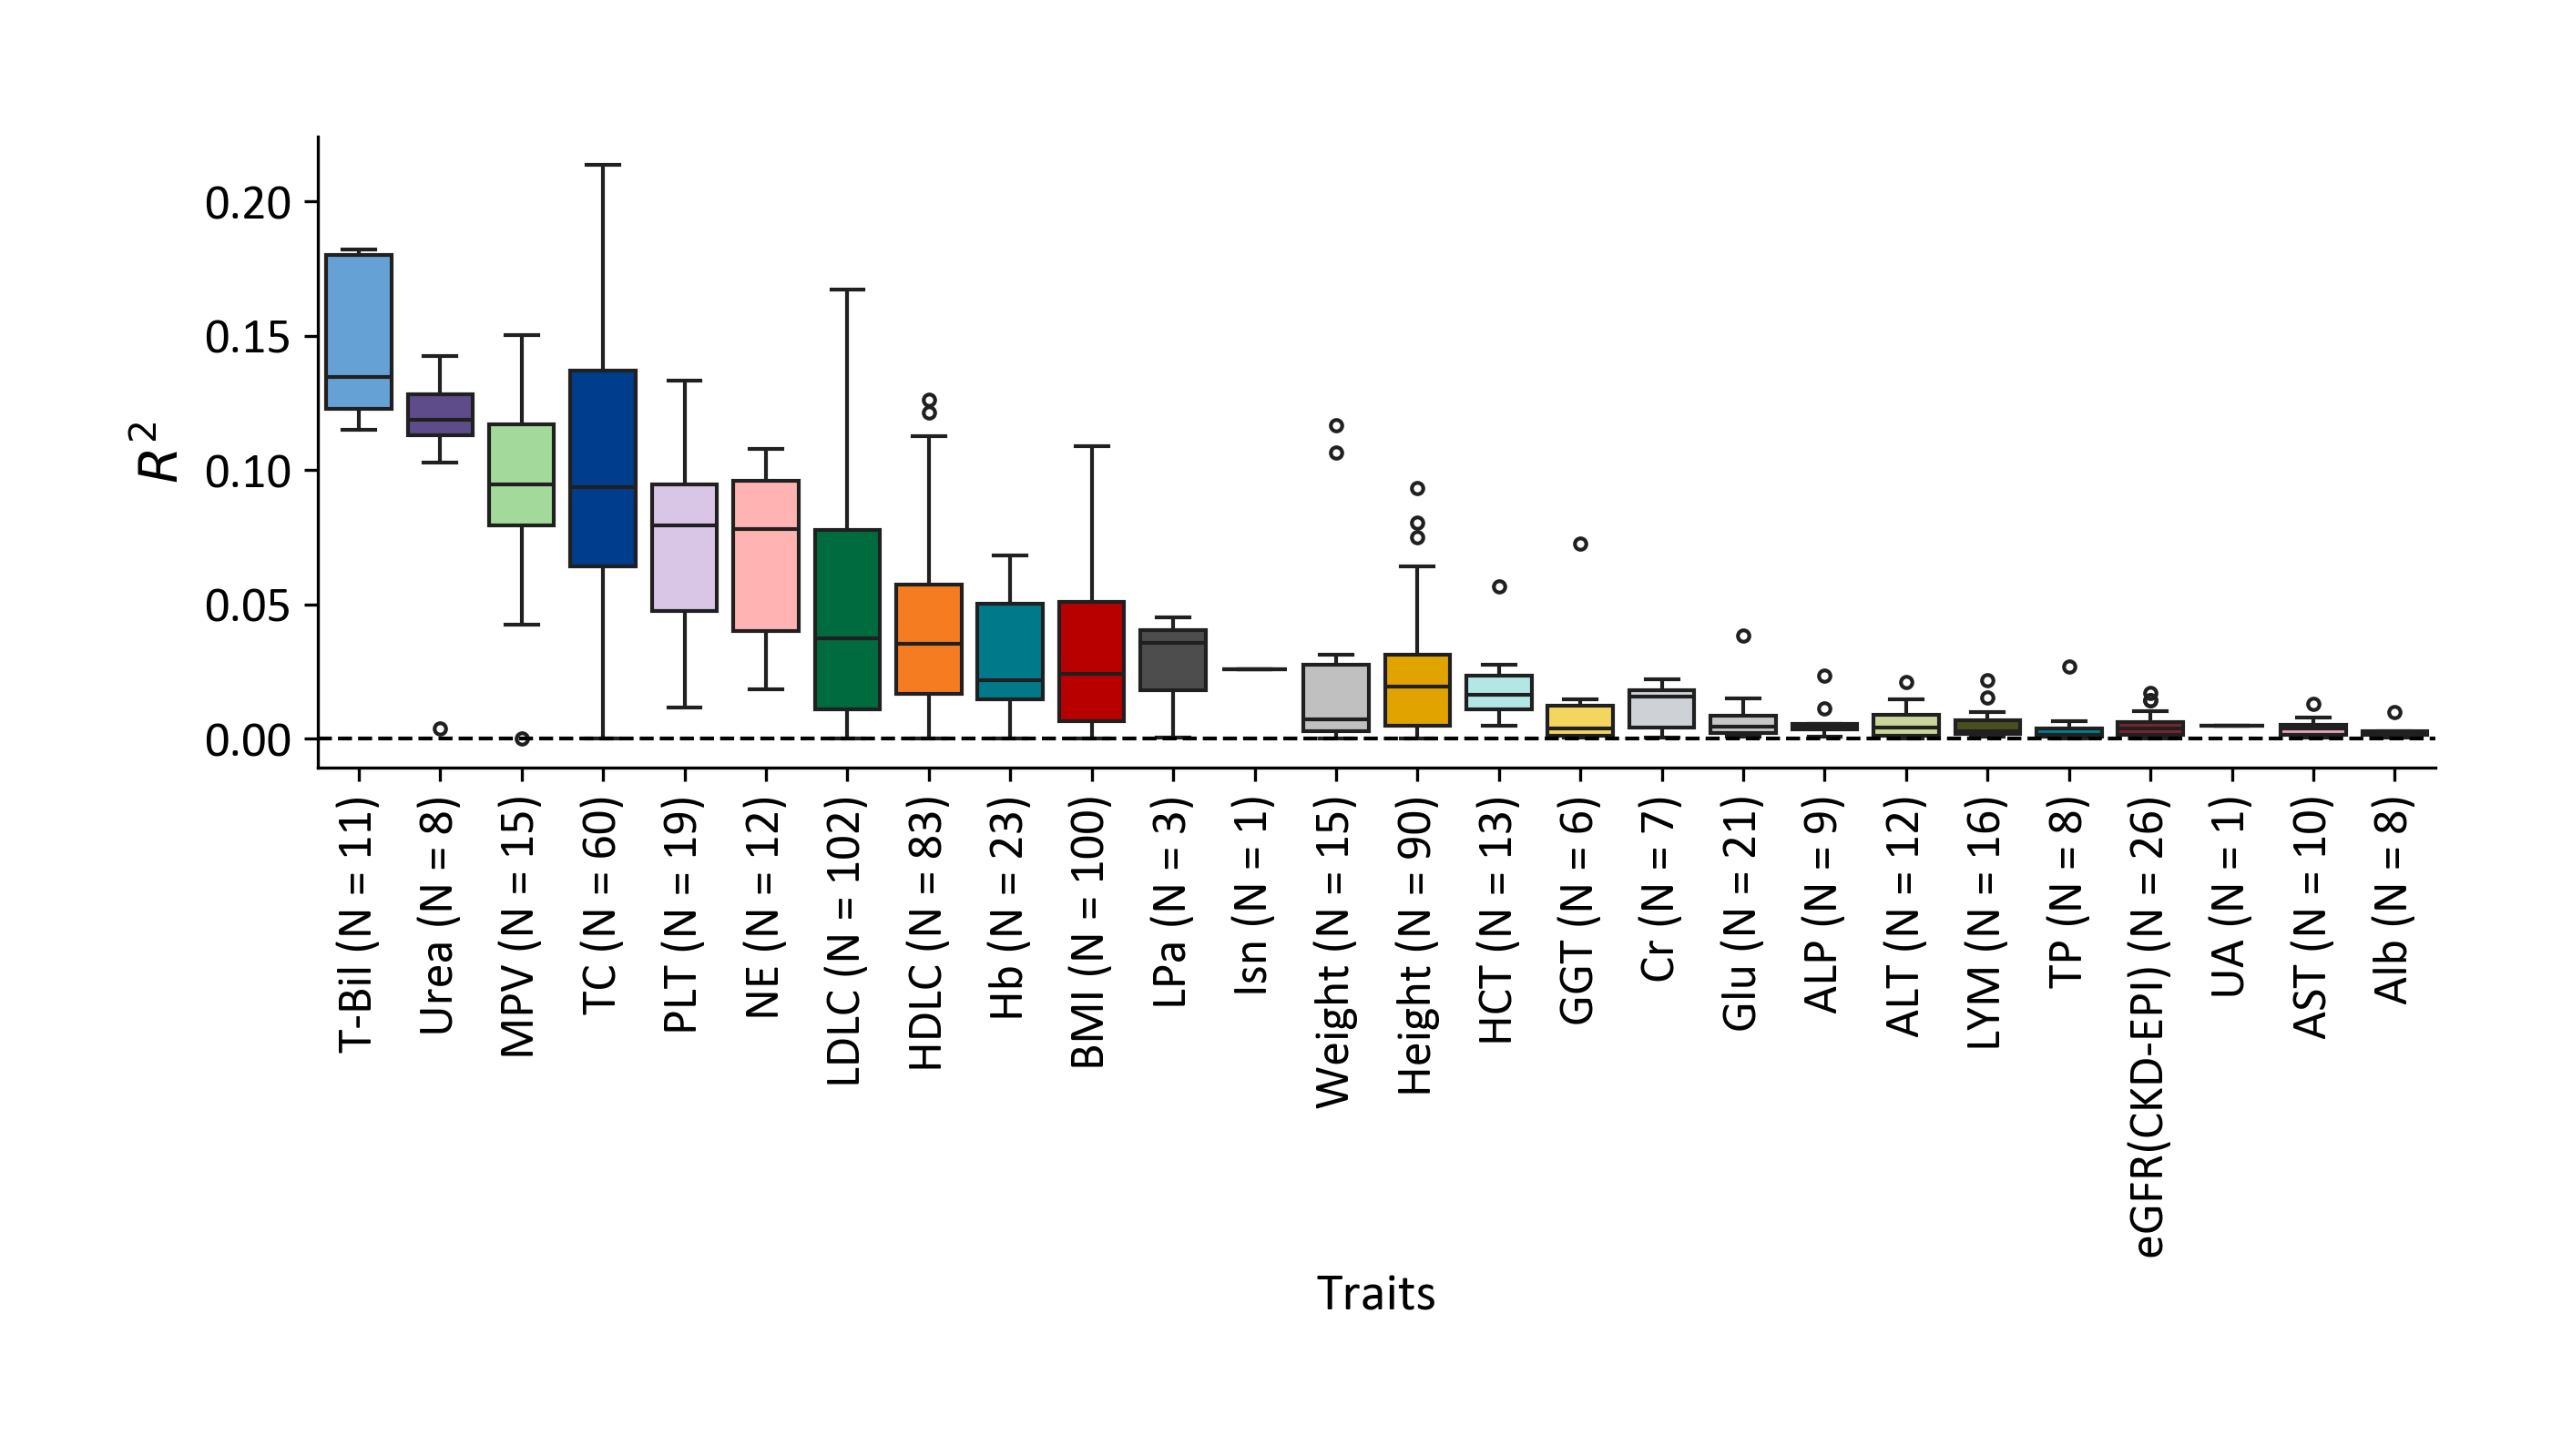

In [15]:
plt_data = compare_res_df_fdr.copy().query("ScoreType == 'PRS'")
order = (
    plt_data.groupby("Traits").mean()["R2"].sort_values(ascending=False).index.tolist()
)
counts = plt_data.groupby("Traits").size().loc[order].to_dict()
plt_data["Traits"] = plt_data["Traits"].apply(
    lambda x: f"{x} (N = {counts[x]:.0f})" if x in order else x
)
order = (
    plt_data.groupby("Traits").mean()["R2"].sort_values(ascending=False).index.tolist()
)
counts = plt_data.groupby("Traits").size().loc[order].to_dict()


fig, ax = plt.subplots(figsize=(10, 3), dpi=300)
sns.boxplot(
    plt_data,
    x="Traits",
    y="R2",
    hue="Traits",
    palette=color_list,
    # color="blue",
    saturation=1,
    ax=ax,
    order=order,
)
plt.setp(ax.get_xticklabels(), rotation=90, ha="center", fontsize=13)
plt.setp(ax.get_yticklabels(), rotation=0, ha="right", fontsize=13)

ax.axhline(0, color="k", linestyle="--", linewidth=1)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_ylabel(r"$R^2$", fontsize=14)
ax.set_xlabel("Traits", fontsize=14)

save_fig(fig, SuppFigure5Dir / "SuppFig5", dpi=default_dpi)

# save_fig(fig, Figure5Dir / "SuppFig_PRS", dpi=default_dpi)